In [1]:
import pandas as pd

# Load the dataset
df_charging_stations = pd.read_csv('Charging_st_count.csv')

# Basic information about the dataset
print(df_charging_stations.info())

# Check the first few rows
df_charging_stations.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Category           16 non-null     object
 1   City/Highway       16 non-null     object
 2   Charging Stations  16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes
None


,Category,City/Highway,Charging Stations
0,City,Chandigarh,48
1,City,Delhi,94
2,City,Jaipur,49
3,City,B'Lore,60
4,City,Ranchi,30


In [2]:
# Check for missing values
print(df_charging_stations.isnull().sum())

# Clean any 'Total' rows if needed
df_cleaned = df_charging_stations[df_charging_stations['City/Highway'] != 'Total']


Category             0
City/Highway         0
Charging Stations    0
dtype: int64


In [3]:
# Summary statistics for the number of charging stations
df_cleaned['Charging Stations'].describe()


count    14.000000
mean     33.785714
std      25.404962
min       1.000000
25%      15.250000
50%      30.000000
75%      48.750000
max      94.000000
Name: Charging Stations, dtype: float64

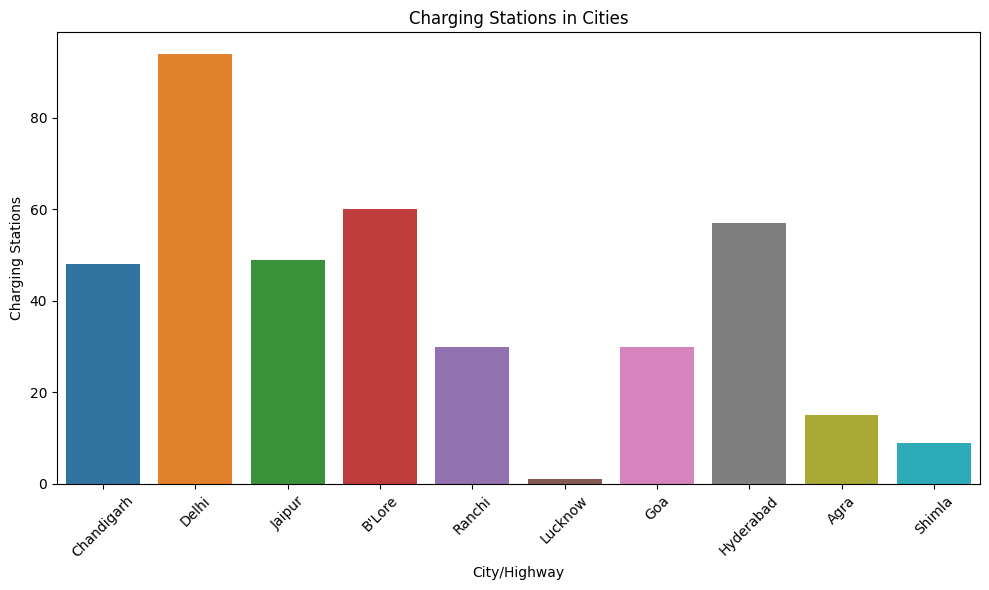

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for City vs Charging Stations
city_df = df_cleaned[df_cleaned['Category'] == 'City']
plt.figure(figsize=(10,6))
sns.barplot(x='City/Highway', y='Charging Stations', data=city_df)
plt.title('Charging Stations in Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


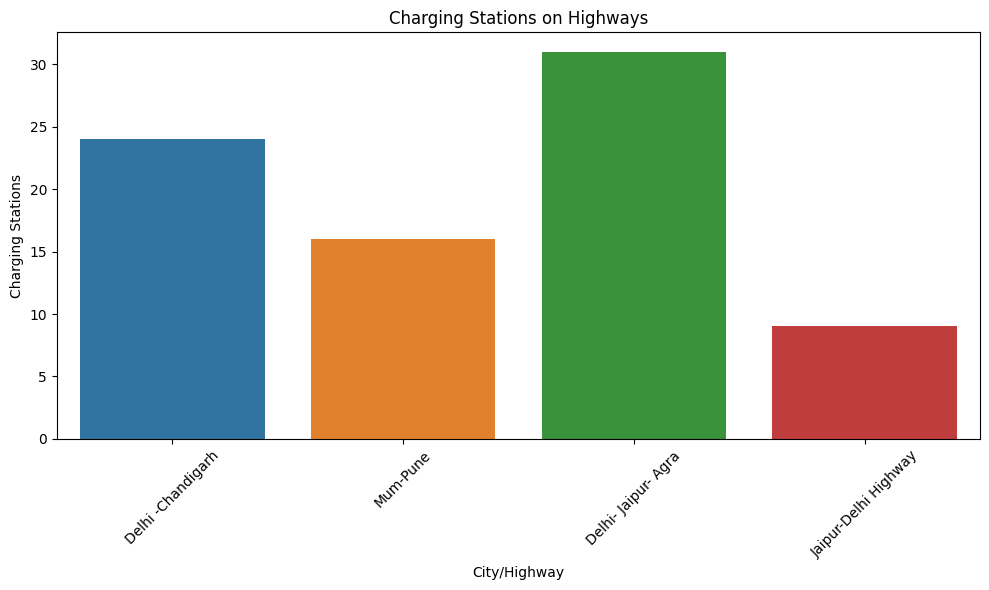

In [5]:
# Plot for Highway vs Charging Stations
highway_df = df_cleaned[df_cleaned['Category'] == 'Highway']
plt.figure(figsize=(10,6))
sns.barplot(x='City/Highway', y='Charging Stations', data=highway_df)
plt.title('Charging Stations on Highways')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\svgau\AppData\Local\Temp\ipykernel_8692\2657575137.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(X)


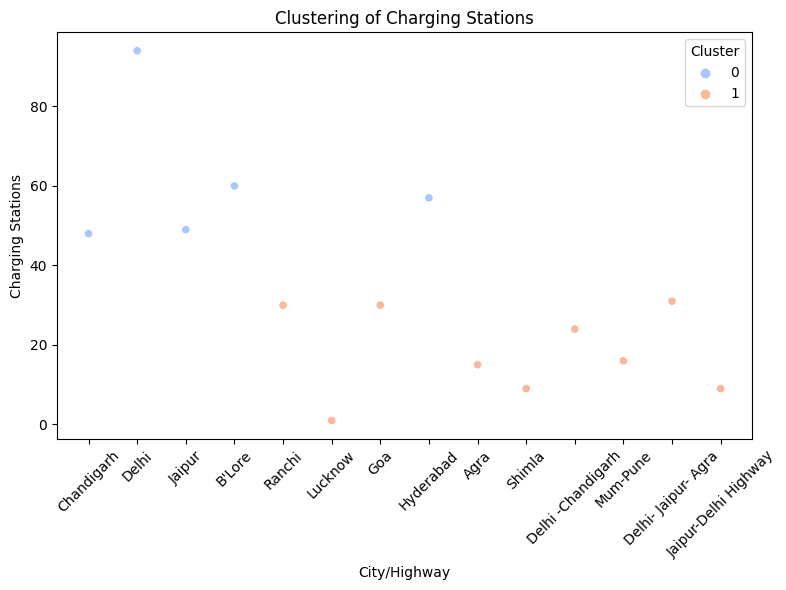

In [6]:
from sklearn.cluster import KMeans

# Extract features for clustering
X = df_cleaned[['Charging Stations']].values

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
df_cleaned['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='City/Highway', y='Charging Stations', hue='Cluster', data=df_cleaned, palette='coolwarm')
plt.title('Clustering of Charging Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
